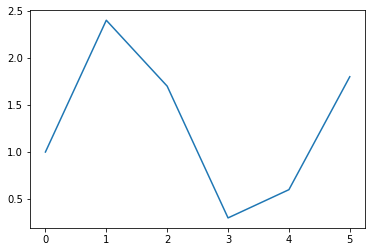

In [3]:
from pylab import plot, show
y = [1.0, 2.4, 1.7, 0.3, 0.6, 1.8]
plot(y)
show()

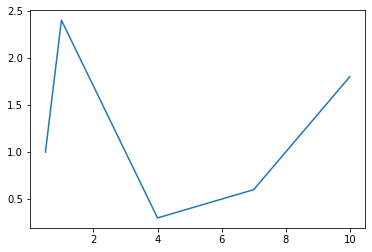

In [4]:
from pylab import plot,show
x = [ 0.5, 1.0, 2.0, 4.0, 7.0, 10.0 ]
y = [ 1.0, 2.4, 1.7, 0.3, 0.6, 1.8 ]
plot(x,y)
show()

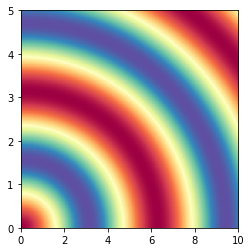

In [30]:
from pylab import imshow, show
from numpy import loadtxt

data = loadtxt('circular.txt', float)
imshow(data, origin="lower", cmap="Spectral_r", extent=[0,10,0,5], aspect=2.0)
show()

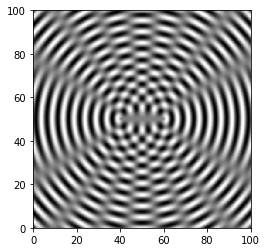

In [31]:
from math import sqrt,sin,pi
from numpy import empty
from pylab import imshow,gray,show

wavelength = 5.0
k = 2*pi/wavelength
xi0 = 1.0
separation = 20.0      # Separation of centers in cm
side = 100.0           # Side of the square in cm
points = 500           # Number of grid points along each side
spacing = side/points  # Spacing of points in cm


# Calculate the positions of the centers of the circles
x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2

# Make an array to store the heights
xi = empty([points,points],float)

# Calculate the values in the array
for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        r1 = sqrt((x-x1)**2+(y-y1)**2)
        r2 = sqrt((x-x2)**2+(y-y2)**2)
        xi[i,j] = xi0*sin(k*r1) + xi0*sin(k*r2)

# Make the plot
imshow(xi,origin="lower",extent=[0,side,0,side])
gray()
show()

In [39]:
# from vpython import sphere
# L = 5
# R = 0.3
# for i in range(-L,L+1):
#     for j in range(-L,L+1):
#         for k in range(-L,L+1):
#             sphere(pos=vector([i,j,k]),radius=R)

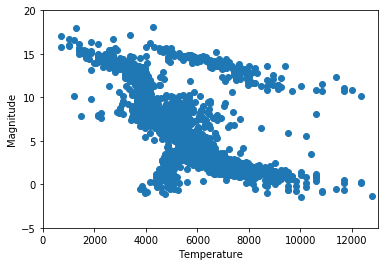

In [33]:
from pylab import scatter,xlabel,ylabel,xlim,ylim,show
from numpy import loadtxt

data = loadtxt("stars.txt",float)
x = data[:,0]
y = data[:,1]

scatter(x,y)
xlabel("Temperature")
ylabel("Magnitude")
xlim(0,13000)
ylim(-5,20)
show()

In [ ]:
import vpython

pyramid(pos)

In [ ]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)

# Main loop
delta = 1.0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi

# Make a plot
imshow(phi)
gray()
show()